In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Himanshu-1703/reddit-sentiment-analysis/refs/heads/main/data/reddit.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [3]:
df.dropna(inplace=True)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df = df[~(df['clean_comment'].str.strip() == '')]

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()

    # Remove trailing and leading whitespaces
    comment = comment.strip()

    # Remove newline characters
    comment = re.sub(r'\n', ' ', comment)

    # Remove non-alphanumeric characters, except punctuation
    comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

    # Remove stopwords but retain important ones for sentiment analysis
    stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

    return comment

In [9]:
# Apply the preprocessing function to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(preprocess_comment)

In [10]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Step 1: Vectorize the comments using Bag of Words (CountVectorizer)
vectorizer = CountVectorizer(max_features=10000)  # Bag of Words model with a limit of 1000 features

In [13]:
X = vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category']  # Assuming 'sentiment' is the target variable (0 or 1 for binary classification)

In [14]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
X.shape

(36793, 10000)

In [16]:
y

0        1
1        1
2       -1
3        0
4        1
        ..
37244    0
37245    1
37246    0
37247    1
37248    0
Name: category, Length: 36793, dtype: int64

In [17]:
y.shape

(36793,)

-1_precision 1.0
-1_recall 0.004242424242424243
-1_f1-score 0.008449004224502113
-1_support 1650.0
0_precision 0.6651670951156813
0_recall 0.8101761252446184
0_f1-score 0.7305452620434092
0_support 2555.0
1_precision 0.6231132075471698
1_recall 0.8376664552948636
1_f1-score 0.7146334866107655
1_support 3154.0
macro avg_precision 0.762760100887617
macro avg_recall 0.5506950015939688
macro avg_f1-score 0.48454258429289226
macro avg_support 7359.0
weighted avg_precision 0.7222178264199401
weighted avg_recall 0.6412556053811659
weighted avg_f1-score 0.5618206302842361
weighted avg_support 7359.0


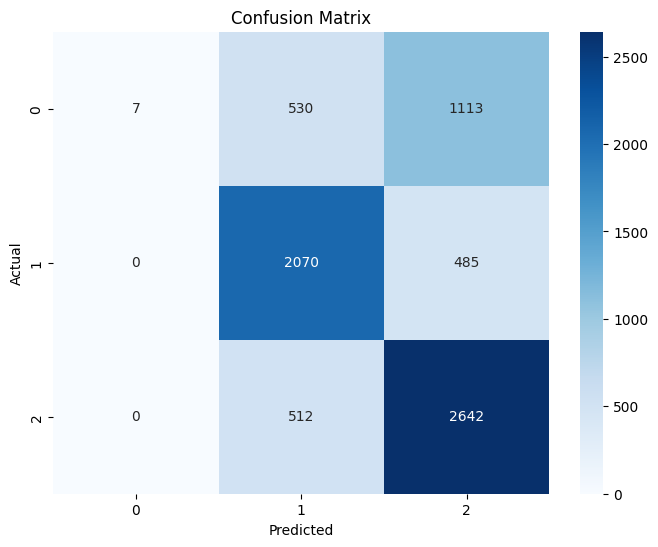

Accuracy: 0.6412556053811659


In [18]:
# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
n_estimators = 200
max_depth = 15
# Initialize and train the model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)














classification_rep = classification_report(y_test, y_pred, output_dict=True)

for label, metrics in classification_rep.items():
    if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
        for metric, value in metrics.items():
            print(f"{label}_{metric}", value)

# Confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()






print(f"Accuracy: {accuracy}")

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.00      0.01      1650
           0       0.67      0.81      0.73      2555
           1       0.62      0.84      0.71      3154

    accuracy                           0.64      7359
   macro avg       0.76      0.55      0.48      7359
weighted avg       0.72      0.64      0.56      7359



In [21]:
df.to_csv('reddit_preprocessing.csv', index=False)